In [1]:
using Distributions
using Plots
using LaTeXStrings
using Interact


#pyplot()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9787119013835081253\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14109958828489981612\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9787119013835081253\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
m(theta; wf=0.5) = Normal(theta, wf * theta)

m (generic function with 1 method)

## Linear scaling of standard deviation
If we scale our std linearly with the mean, the measurement distribution for a given mean and std is of course still symmetric.

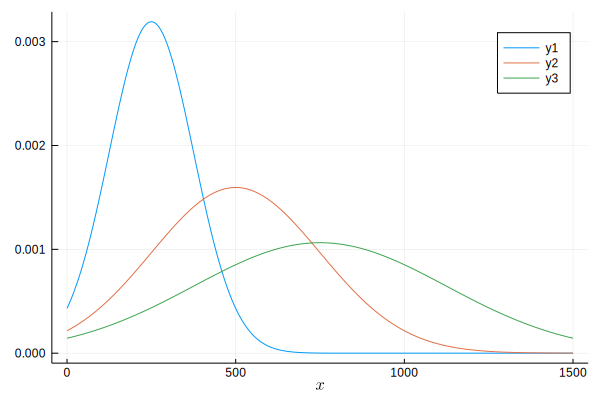

In [3]:
x = 0:1:1500

ax = plot(xlabel=L"x")
for theta in [250, 500, 750]
    plot!(ax, x, pdf.(m(theta), x))
end

display(ax)

The likelihood function, on the other hand, is no longer symmetric / Gaussian and its maximum is no longer at the mean!

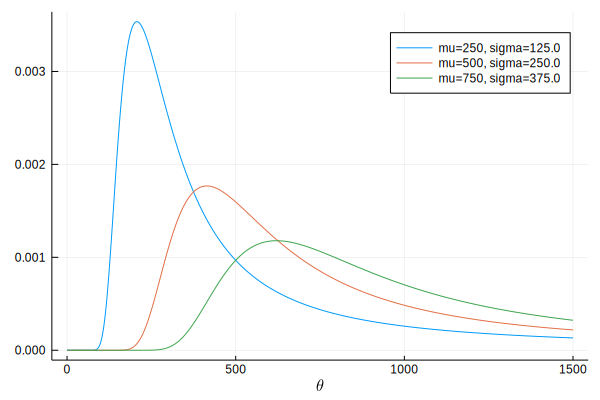

In [5]:
t = 0:1.:1500

ax = plot(xlabel=L"\theta")
for m0 in [250, 500, 750]
    plot!(ax, t, pdf.(m.(t), m0), label="mu=$(m0), sigma=$(m0 * 0.5)")
end

display(ax)

### Posterior distribution
What follows from this, is that the posterior distribution is also not Gaussian anymore, which prohibits a conjugate prior analysis and a closed form solution.

Is this correct or is there a closed-form solution for this posterior distribution?

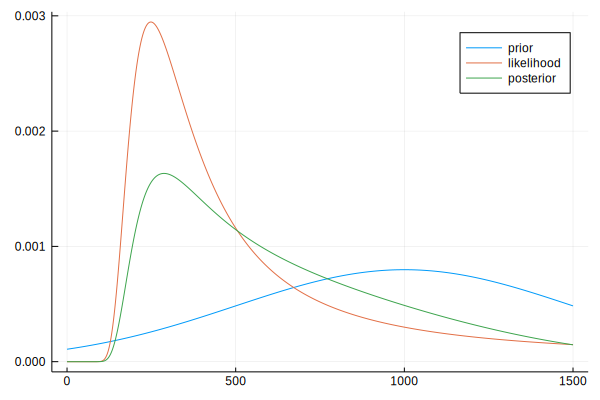

In [6]:
m0 = 300

likelihood = pdf.(m.(t), m0)
prior = pdf.(Normal(1000, 500), t)

posterior = likelihood .* prior
posterior = posterior ./ sum(posterior)

plot(t, prior, label="prior")
plot!(t, likelihood, label="likelihood")
plot!(t, posterior, label="posterior")


## Alternative: log-normal distributions

If log(x) is normally distributed, then x follows a log-normal distribution.

In [7]:
mlog(theta; wf=0.5) = LogNormal(log(theta), wf)

mlog (generic function with 1 method)

### Measurement distribution

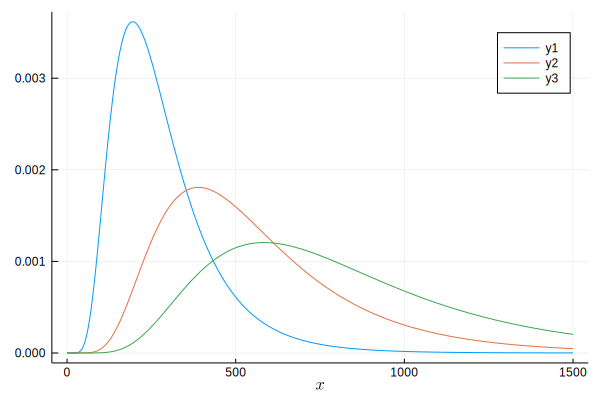

In [8]:
x = 0:1:1500

ax = plot(xlabel=L"x")
for theta in [250, 500, 750]
    plot!(ax, x, pdf.(mlog(theta), x))
end

display(ax)

### Likelihood function


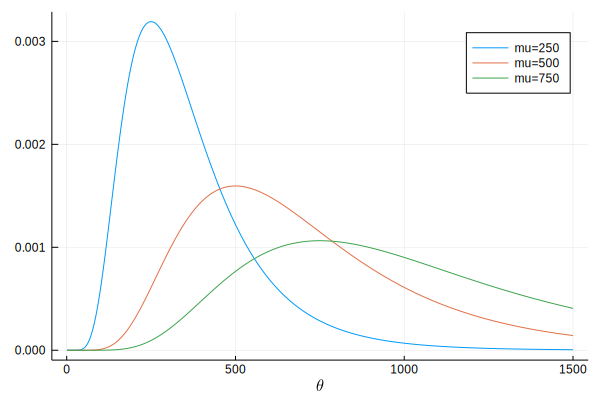

In [9]:

t = 1:1.:1500

ax = plot(xlabel=L"\theta")
for m0 in [250, 500, 750]
    plot!(ax, t, pdf.(mlog.(t, wf=0.5), m0), label="mu=$(m0)")
end

display(ax)

### Posterior distribution




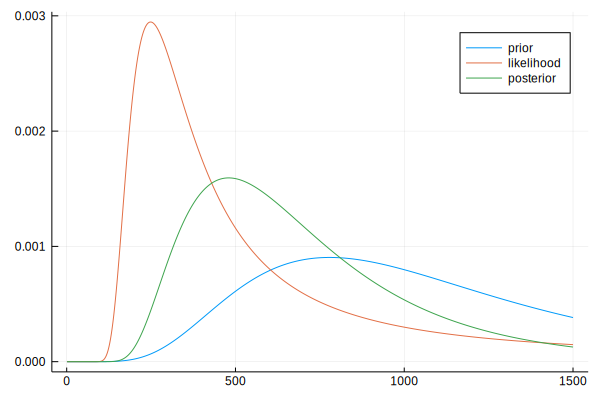

In [9]:
m0 = 300

likelihood = pdf.(m.(t), m0)

mu_prior = log(1000)
prior = pdf.(LogNormal(mu_prior, .5), t)

posterior = likelihood .* prior
posterior = posterior ./ sum(posterior)

#mu_post = 

plot(t, prior, label="prior")
plot!(t, likelihood, label="likelihood")
plot!(t, posterior, label="posterior")

This allows conjugate analysis, since the posterior is Gaussian if we assume a Log-Normal as the conjugate prior.

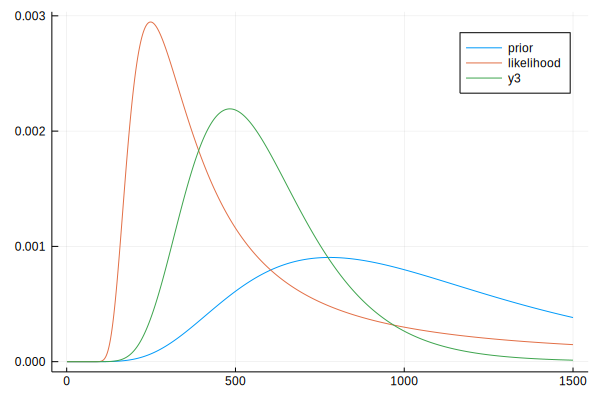

In [10]:
mu_post = 0.5 * (log(m0) + mu_prior)

sigma_post = (1 / 0.5^2 + 1 / 0.5^2)^(-1/2)

plot(t, prior, label="prior")
plot!(t, likelihood, label="likelihood")
plot!(t, pdf.(LogNormal(mu_post, sigma_post), t))

## Different approximations

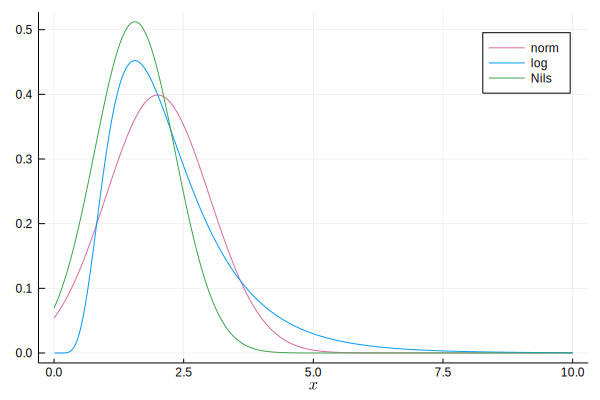

In [11]:
x = 0:0.01:10

ax = plot(xlabel=L"x")
for theta in [2]
    plot!(ax, x, pdf.(m(theta), x), color=0, label="norm")
    plot!(ax, x, pdf.(mlog(theta), x), color=1, label="log")
    plot!(ax, x, pdf.(Normal(mode(mlog(theta)), 0.5 * mode(mlog(theta))), x), label="Nils")
end

display(ax)

## Different Weber fractions

For the standard deviations scaled by a WF of 0.5 as demonstrated above, the log-normal distribution is very different from the normal distribution. For other parameters, the approximation of the log-normal by the normal works rather well. Let us now examine for which range of parameters this approximation holds.

In [32]:
x = 0:0.01:10

@manipulate for theta=1:0.5:5, w=0.1:0.1:2.0
    plot(x, pdf.(m(theta, wf=w), x), color=0, label="norm", ylim=(0, 0.5))
    plot!(x, pdf.(mlog(theta, wf=w), x), color=1, label="log")
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["theta"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f5d5fd84010, Task (runnable) @0x00007f5d5fd84010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"3712787158211856277\",\"id\":\"ob_236\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"